# `find_porosity_threshold`

This function dilates the solid phase iteratively until the void space no longer percolates.  The percolating porosity is used in a popular tortuosity correlation by Tomadakis and Sotirichos [^1]:

$$ tau = \bigg(\frac{1-\varepsilon}{\varepsilon - \varepsilon_p}\bigg)^{\alpha}$$

[^1]: Tomadakis MM and Sotirichos VA. Ordinary and transition regime diffusion in random fiber structures. AICHE J. 39(3), 1993.

In [1]:
import matplotlib.pyplot as plt

import porespy as ps

## `im`


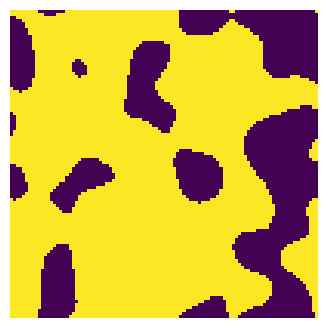

In [10]:
im = ps.generators.blobs([100, 100], porosity=0.7, blobiness=0.5, seed=1)

fig, ax = plt.subplots(figsize=[4, 4])
ax.imshow(im)
ax.axis(False);

In [11]:
r = ps.metrics.find_porosity_threshold(im)
print(r)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Results of find_porosity_threshold generated at Mon Jun 30 18:44:28 2025
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
eps_orig                  0.7
eps_orig_perc             0.6771
eps_thresh                0.2843
eps_thresh_perc           0.2179
R                         7
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


The function returns a `Results` object with several attributes.  `eps_orig` is the original porosity of `im` while `eps_orig_perc` is the fraction of the original porosity that percolates between the inlet and outlet faces (which default to the `x=0` and `x=-1` faces).  `eps_thresh` is the total porosity of the image at the percolation threshold, meaning that if the solid were dilated one more time that the image would no longer percolate.  `eps_thresh_perc` is the fraction of the void space at the percolation threshold which is connected to the percolating cluster(s).  

Lastly, `R` is for reproducing the percolating image. This is possible since the dilation is done by thresholding the distance transform of the void space.  For instance:

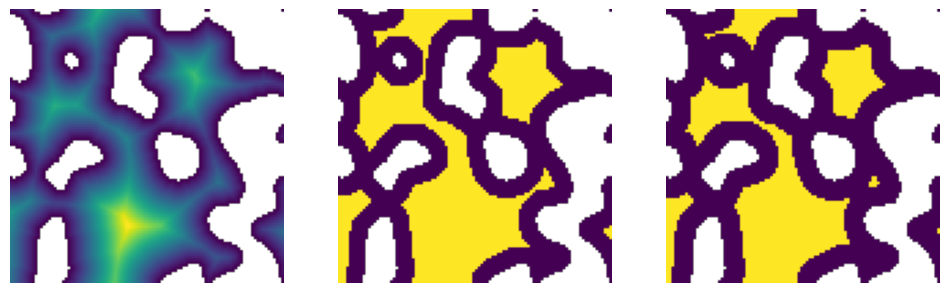

In [18]:
edt = ps.tools.get_edt()
dt = edt(im)

fig, ax = plt.subplots(1, 3, figsize=[12, 4])
ax[0].imshow(dt/im)
ax[0].axis(False)
ax[1].imshow((dt >= r.R)/im)
ax[1].axis(False)
ax[2].imshow((dt >= (r.R + 1))/im)
ax[2].axis(False);

## 'axis'
Percolation is a direction dependent phenomena.  By default the function considers the x-direction, but this can be specified:

In [19]:
r = ps.metrics.find_porosity_threshold(im, axis=1)
print(r)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Results of find_porosity_threshold generated at Mon Jun 30 18:52:11 2025
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
eps_orig                  0.7
eps_orig_perc             0.6771
eps_thresh                0.4754
eps_thresh_perc           0.4693
R                         4
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


Percolation is reached in the y-direction sooner due to the relatively small opening on the right hand side which closes at `R==4`.

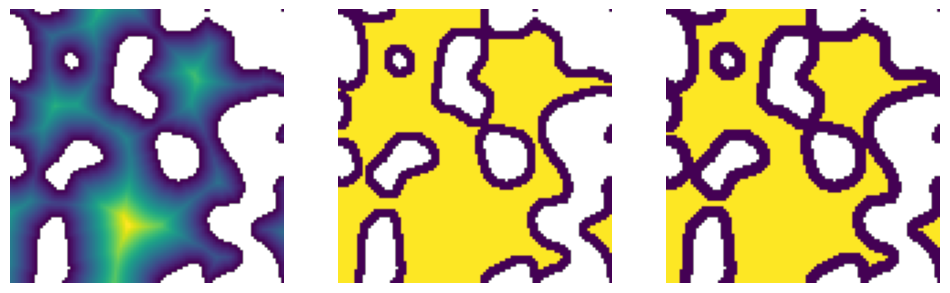

In [20]:
fig, ax = plt.subplots(1, 3, figsize=[12, 4])
ax[0].imshow(dt/im)
ax[0].axis(False)
ax[1].imshow((dt >= r.R)/im)
ax[1].axis(False)
ax[2].imshow((dt >= (r.R + 1))/im)
ax[2].axis(False);

# `conn`

The connectivity of the pixels/voxels can also be specified as either `min` or `max`, meaning 4 or 8 neighbors in 2D, and 6 or 26 in 3D.